In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
import plotly.graph_objects as go
import matplotlib
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = pd.read_csv("zameen-updated.csv")
dataset.head()      

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


DATA ANALYSIS

In [3]:
df = dataset
df.info()

# as we can see we have a lot of data and alot of features that we are not gonna use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [4]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


In [5]:
df.isna().sum()
# as we can see only agency and agent got the null values 
# as we are going to remove those columns so we dont specifically need to remove the na values

property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
area                 0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Area Type            0
Area Size            0
Area Category        0
dtype: int64

<AxesSubplot:>

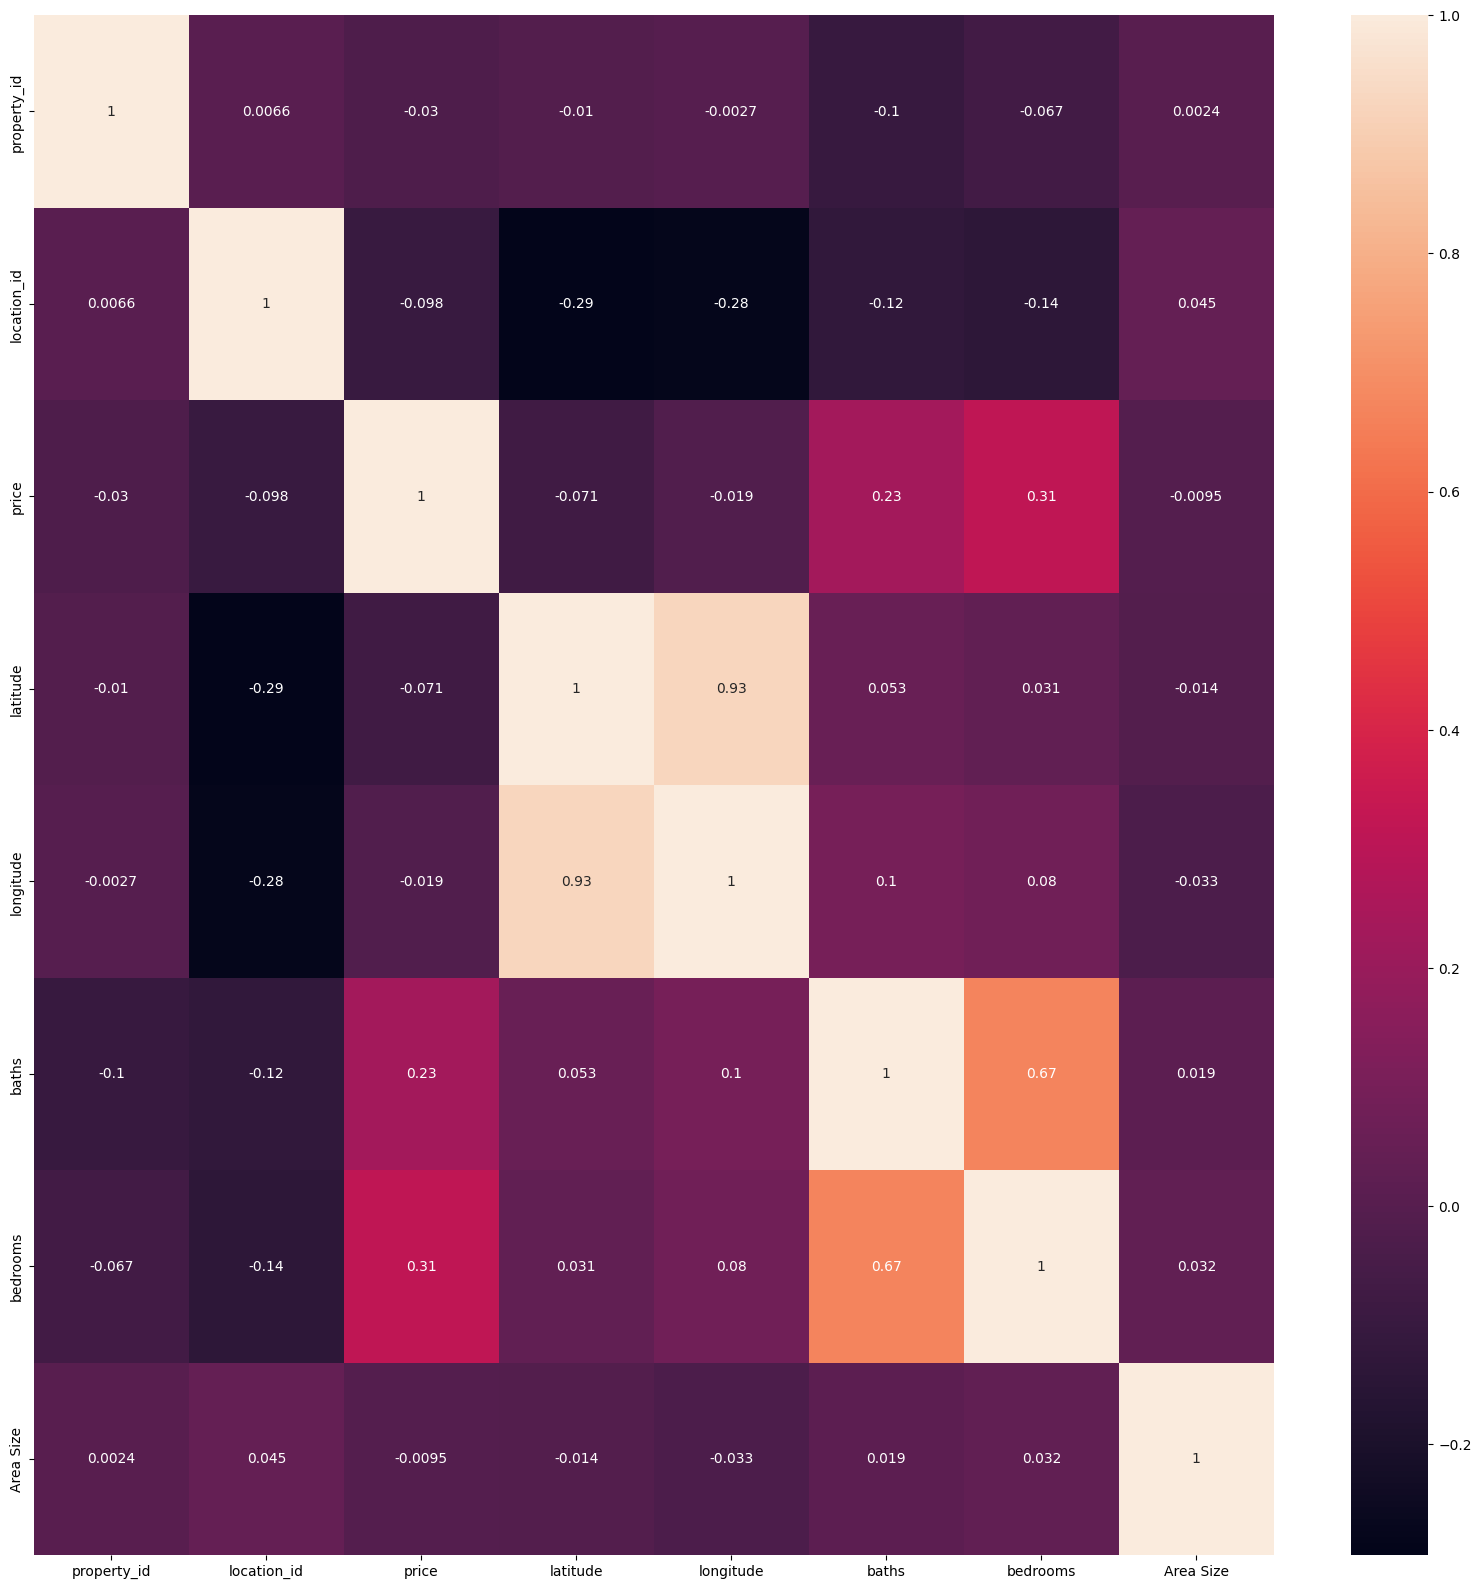

In [6]:
plt.figure(figsize=(20,20))
cor=df.corr()
sns.heatmap(cor,annot=True)

In [7]:
df["city"].unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [8]:
df["city"].value_counts()

Karachi       60484
Lahore        41427
Islamabad     37426
Rawalpindi    20976
Faisalabad     8133
Name: city, dtype: int64

In [9]:
#as we can see there are different cities within the same dataset so lets just reduce it to one city
#i will only keep the data related to the city Lahore becuase there hasnt been much of the machine Learning work for Lahore

In [10]:
df = df[df["city"] == "Lahore"]
df.head()

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
47,347795,8,https://www.zameen.com/Property/lahore_model_t...,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,07-17-2019,Real Biz International,Usama Khan,Kanal,6.0,5-10 Kanal
48,482892,48,https://www.zameen.com/Property/lahore_multan_...,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,10-06-2018,Khan Estate,mohsinkhan and B,Kanal,1.0,1-5 Kanal
49,555962,75,https://www.zameen.com/Property/eden_eden_aven...,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,07-03-2019,Shahum Estate 2,"Babar Hameed, Raja Omar",Marla,9.0,5-10 Marla
50,562843,3821,https://www.zameen.com/Property/gulberg_2_gulb...,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,04-04-2019,NaN,NaN,Kanal,1.0,1-5 Kanal
51,686990,3522,https://www.zameen.com/Property/allama_iqbal_t...,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,04-04-2019,NaN,NaN,Marla,11.0,10-15 Marla


In [11]:
df=df.drop(['property_id','location_id','page_url','date_added','agency','agent'],axis=1)

In [12]:
df.head()

,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category
47,House,220000000,Model Town,Lahore,Punjab,31.483869,74.325686,0,6 Kanal,For Sale,0,Kanal,6.0,5-10 Kanal
48,House,40000000,Multan Road,Lahore,Punjab,31.431593,74.179980,5,1 Kanal,For Sale,5,Kanal,1.0,1-5 Kanal
49,House,9500000,Eden,Lahore,Punjab,31.499348,74.416959,0,9 Marla,For Sale,3,Marla,9.0,5-10 Marla
50,House,125000000,Gulberg,Lahore,Punjab,31.522069,74.355512,7,1 Kanal,For Sale,8,Kanal,1.0,1-5 Kanal
51,House,21000000,Allama Iqbal Town,Lahore,Punjab,31.506483,74.286017,5,11 Marla,For Sale,6,Marla,11.0,10-15 Marla


In [13]:
df = df.drop(['city', 'province_name', 'latitude', 'longitude'], axis = 1)

In [14]:
df.head()

,property_type,price,location,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category
47,House,220000000,Model Town,0,6 Kanal,For Sale,0,Kanal,6.0,5-10 Kanal
48,House,40000000,Multan Road,5,1 Kanal,For Sale,5,Kanal,1.0,1-5 Kanal
49,House,9500000,Eden,0,9 Marla,For Sale,3,Marla,9.0,5-10 Marla
50,House,125000000,Gulberg,7,1 Kanal,For Sale,8,Kanal,1.0,1-5 Kanal
51,House,21000000,Allama Iqbal Town,5,11 Marla,For Sale,6,Marla,11.0,10-15 Marla


In [15]:
# now lets see which atre has the most number of properties sold
temp = df.groupby("location")['price'].sum().sort_values(ascending = False)
temp

location
DHA Defence         353794243000
Bahria Town          90640981000
Gulberg              62526266000
Model Town           52829205000
Johar Town           37672941001
                        ...     
Heir                     2500000
Others                   2200000
Maryam Town              2000000
Jewa Town                2000000
Farid Court Road         1200000
Name: price, Length: 619, dtype: int64

Text(0, 0.5, 'Price in')

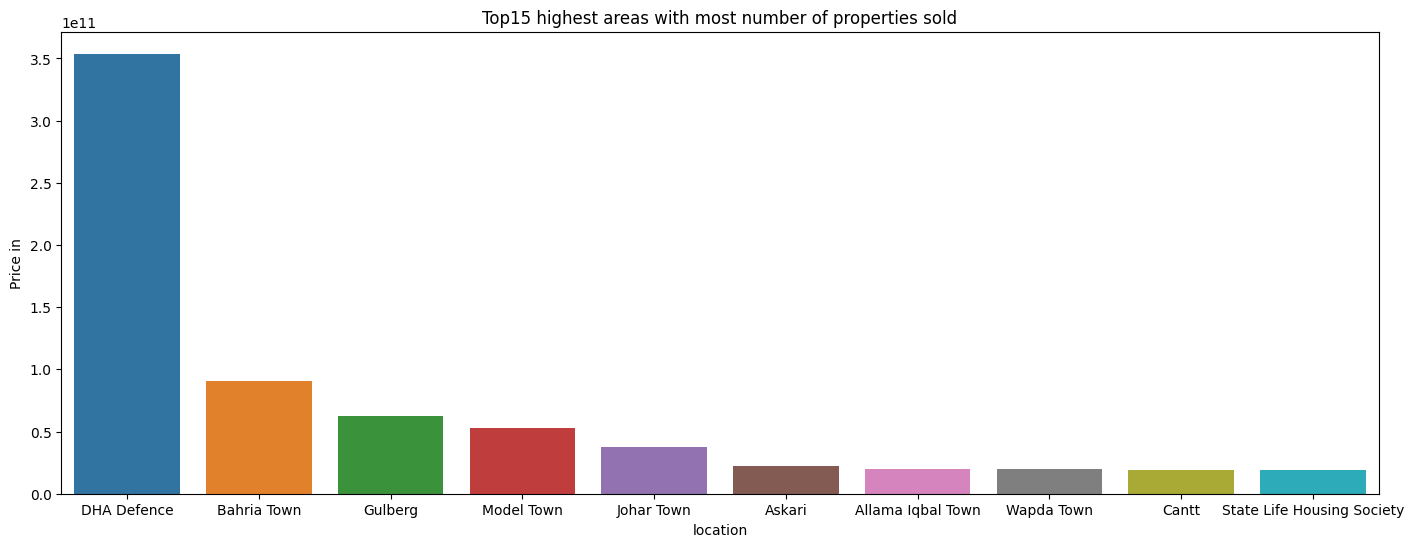

In [16]:
#lets plot and see the top 10 areas with most spendings
temp = df.groupby("location")['price'].sum().sort_values(ascending = False).reset_index()[:10]
plt.figure(figsize=(17,6))
sns.barplot(x='location', y='price', data=temp)
plt.title("Top15 highest areas with most number of properties sold")
plt.xlabel('location')
plt.ylabel('Price in')

In [17]:
df["property_type"].value_counts()
# as we can see there are different types of properties but we will only deal with house, flat and farm house

House            39365
Flat              1640
Farm House         274
Upper Portion       69
Lower Portion       59
Penthouse           12
Room                 8
Name: property_type, dtype: int64

In [18]:
temp = df[df["property_type"].isin(["House", "Flat", "Farm House"])]
df = temp
df["property_type"].value_counts()

House         39365
Flat           1640
Farm House      274
Name: property_type, dtype: int64

In [19]:
df.head()

,property_type,price,location,baths,area,purpose,bedrooms,Area Type,Area Size,Area Category
47,House,220000000,Model Town,0,6 Kanal,For Sale,0,Kanal,6.0,5-10 Kanal
48,House,40000000,Multan Road,5,1 Kanal,For Sale,5,Kanal,1.0,1-5 Kanal
49,House,9500000,Eden,0,9 Marla,For Sale,3,Marla,9.0,5-10 Marla
50,House,125000000,Gulberg,7,1 Kanal,For Sale,8,Kanal,1.0,1-5 Kanal
51,House,21000000,Allama Iqbal Town,5,11 Marla,For Sale,6,Marla,11.0,10-15 Marla


In [20]:
df["Area Type"].value_counts()

Marla    31240
Kanal    10039
Name: Area Type, dtype: int64

In [21]:
df["area"].value_counts()
# now we can see our data is distributed from marlas to kanals
# lets make sure our data is only in one unit and that is going to be kanal as it is a smaller unit

5 Marla      8860
10 Marla     8232
1 Kanal      7693
3 Marla      3455
4 Marla      1433
             ... 
9.1 Marla       1
26 Kanal        1
4.6 Kanal       1
8.1 Kanal       1
3.7 Kanal       1
Name: area, Length: 231, dtype: int64

In [22]:
def convert_marla_to_kanal(value):
   # print(value)
    value = value.split(" ")

    if value[1] == "Marla":
        temp = float(value[0])
        value[0] = str(temp / 20)

    print(value[0])
    return value[0]


# this function will split and check whether the value is in kanal or marla, if it is in marla then it will convert it
# into kanal and return it otherwise it will return the original value i.e. kanal back

In [27]:

df["new_area"] = df["area"].apply(convert_marla_to_kanal)

6
1
0.45
1
0.55
1
0.4
1
1
1.6
0.375
1.2
0.5
0.5
0.5
1
0.9
0.5
0.6
0.55
1
0.15
0.5
0.5
0.5
0.5
1
0.5
0.5
0.5
0.5
1
6.5
0.125
1
0.4
2
8
1.1
2
0.3
1
4.7
0.485
1
0.5
0.9
0.5
0.5
0.85
0.5
0.5
1
0.5
0.5
0.5
0.5
0.5
0.2
0.5
0.25
0.7
2
1
0.275
0.85
1
1
0.5
0.1
0.1
1.1
1
0.5
1
0.6
0.5
0.5
0.5
0.41
0.85
0.6
0.5
0.5
0.5
0.5
0.5
1
8
2
0.15
1
2
10
1
0.15
4
0.35
0.35
1
1
0.25
0.505
1
4.4
2
1
1
1
0.7
1
0.75
1.7
1
1
1
1
0.1
0.5
2
1
1
0.5
0.3
0.15
1
0.1
0.4
0.5
1.2
5
0.5
0.5
1
2
0.65
1
1
1.5
0.5
2
0.25
1
4
0.25
0.25
0.25
4
0.5
0.25
1
0.5
0.85
0.85
1
0.25
0.15
0.5
0.5
1.4
0.5
1
0.5
2
1
1
1
2
0.7
1
1
2
0.5
1
0.7
1.3
0.2
1
0.25
0.215
1
2
1
0.7
1.6
1
0.2
1.2
1
0.5
0.4
0.25
0.25
0.5
0.25
0.5
0.3
0.125
1
1.6
2
0.15
0.5
1
1
1
1
0.2
2.2
0.5
1
0.35
1
1
1
0.6
1
1
1
0.55
0.5
0.4
1
0.25
0.49000000000000005
0.5
0.5
0.15
1
1
0.5
1
0.5
0.25
0.35
1
1
1
1
1
0.3
0.6
0.5
2
1
1
1
1
1
1
0.5
0.5
1
0.6
1
0.5
0.5
0.5
0.5
1
0.5
0.5
1
0.5
0.25
0.5
0.15
2.2
0.5
1
0.25
0.5
0.3
1
1
0.5
1
0.5
1
1
1
1
1
2
1
1
0.5
1
0.5
0.5
0.25
0.9


In [28]:
df['location'].value_counts()

DHA Defence                   7380
Bahria Town                   4796
Johar Town                    1927
Allama Iqbal Town             1027
Askari                        1013
                              ... 
Alia Town                        1
Madar-e-Millat Road              1
Vital Homes Housing Scheme       1
Ashraf Garden                    1
Sundar                           1
Name: location, Length: 619, dtype: int64

In [29]:
#lets remove all the locations which are present less then 25 times
# removing them is important because it may effect our model

df['location'] = df['location'].apply(lambda x: x.strip())
location_count = df['location'].value_counts()
location_count_less_10 = location_count[location_count <= 25]
df['location'] = df['location'].apply(lambda x: 'other' if x in location_count_less_10 else x)

df['location'].value_counts()

DHA Defence                      7380
Bahria Town                      4796
other                            3106
Johar Town                       1927
Allama Iqbal Town                1027
                                 ... 
New Chauburji Park                 27
Mozang                             27
T & T Aabpara Housing Society      27
Al Hamad Colony                    26
Islam Nagar                        26
Name: location, Length: 163, dtype: int64

In [31]:
#lets remove the extra features
df = df.drop(["area", "purpose", "Area Type" , "Area Size", "Area Category"], axis = 1)
df.head()

,property_type,price,location,baths,bedrooms,new_area
47,House,220000000,Model Town,0,0,6
48,House,40000000,Multan Road,5,5,1
49,House,9500000,Eden,0,3,0.45
50,House,125000000,Gulberg,7,8,1
51,House,21000000,Allama Iqbal Town,5,6,0.55


In [32]:
# lets remove all the rows with no bedroom and baths
df.drop(df[(df['bedrooms']==0) | (df['baths']==0)].index, inplace=True)
df.head()

,property_type,price,location,baths,bedrooms,new_area
48,House,40000000,Multan Road,5,5,1
50,House,125000000,Gulberg,7,8,1
51,House,21000000,Allama Iqbal Town,5,6,0.55
52,House,52000000,Gulberg,6,5,1
53,House,16500000,Military Accounts Housing Society,7,6,0.4


In [35]:
df = df[df.new_area != "4,450"]
df = df[df.new_area != "4,500"]

In [36]:
df['area_sqft'] = df['new_area'].astype(float) * 5445
df.head()

,property_type,price,location,baths,bedrooms,new_area,area_sqft
48,House,40000000,Multan Road,5,5,1,5445.00
50,House,125000000,Gulberg,7,8,1,5445.00
51,House,21000000,Allama Iqbal Town,5,6,0.55,2994.75
52,House,52000000,Gulberg,6,5,1,5445.00
53,House,16500000,Military Accounts Housing Society,7,6,0.4,2178.00


In [37]:
df['price_per_sqft'] = df['price'] / df['area_sqft']
df.head()

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft
48,House,40000000,Multan Road,5,5,1,5445.00,7346.189164
50,House,125000000,Gulberg,7,8,1,5445.00,22956.841139
51,House,21000000,Allama Iqbal Town,5,6,0.55,2994.75,7012.271475
52,House,52000000,Gulberg,6,5,1,5445.00,9550.045914
53,House,16500000,Military Accounts Housing Society,7,6,0.4,2178.00,7575.757576


In [38]:
df['location'] = df['location'].apply(lambda x: x.strip())
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(20)

location
DHA Defence                          6784
Bahria Town                          4286
other                                2422
Johar Town                           1528
Askari                                937
State Life Housing Society            784
Allama Iqbal Town                     694
Wapda Town                            679
Al Rehman Garden                      656
Bahria Orchard                        517
Model Town                            508
Gulberg                               457
Cantt                                 435
Paragon City                          430
Lalazaar Garden                       349
DHA 11 Rahbar                         346
Pak Arab Housing Society              345
Sabzazar Scheme                       336
Samanabad                             315
Military Accounts Housing Society     310
Name: location, dtype: int64

In [39]:
len(location_stats[location_stats <= 10])
# we can see the there are 363 values under 10 so we can categorize them as other
# it will also help us in dimensinality reduction as

2

In [40]:
locations_less_than_10 = location_stats[location_stats <= 10]
df['location'] = df['location'].apply(lambda x:'others' if x in locations_less_than_10 else x)
len(location_stats[location_stats <= 10])

2

In [41]:
df['location'].nunique()

162

In [42]:
def plot_scatter_chart(df, location):
    bedroom_2 = df[(df['location'] == location) & (df['bedrooms'] == 2)]
    bedroom_3 = df[(df['location'] == location) & (df['bedrooms'] == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(bedroom_2['area_sqft'], bedroom_2['price']/100000, color='blue', label="2 Bedroom", s=50)
    plt.scatter(bedroom_3['area_sqft'], bedroom_3['price']/100000, marker='+', color="green", label="3 Bedroom", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

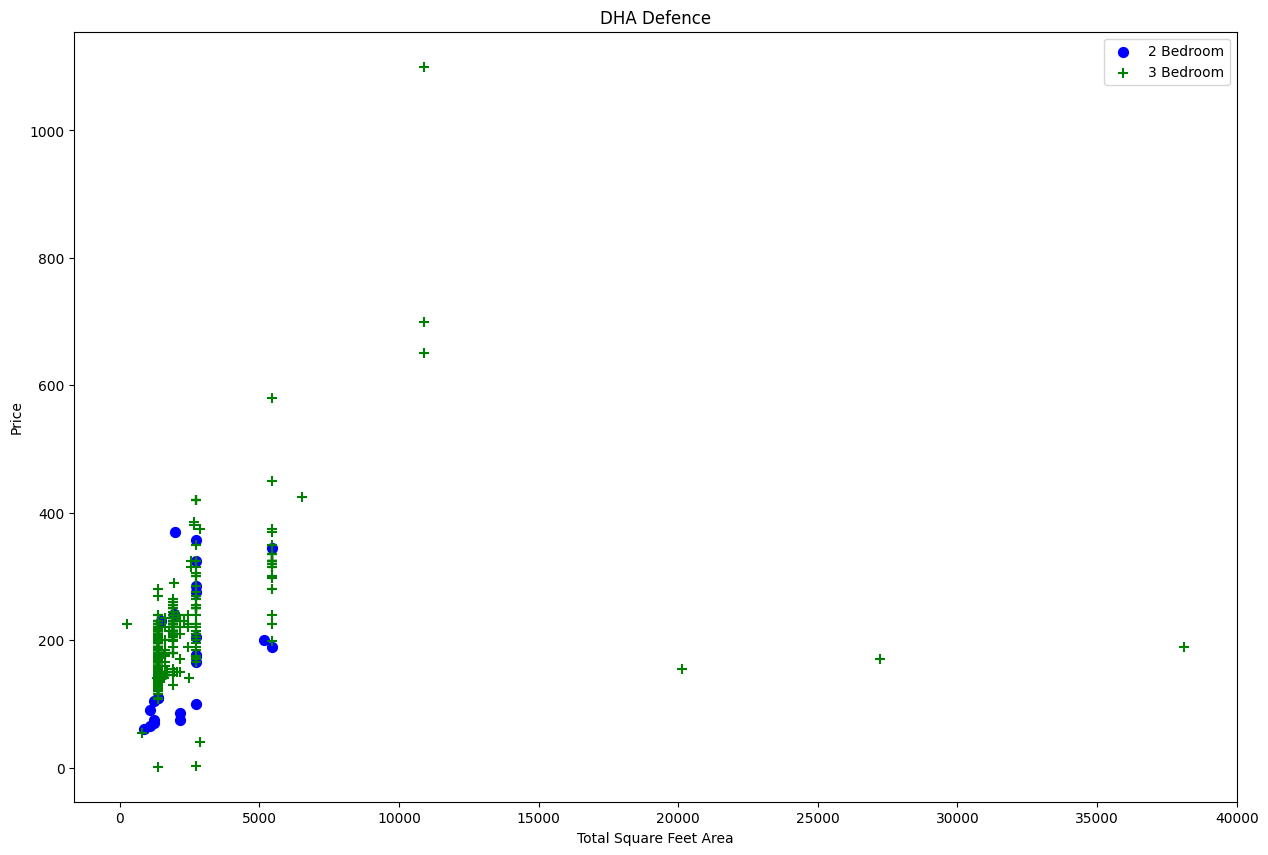

In [43]:
plot_scatter_chart(df, "DHA Defence")

REMOVING OUTLIERS


In [44]:
df.head(20)

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft
48,House,40000000,Multan Road,5,5,1,5445.000,7346.189164
50,House,125000000,Gulberg,7,8,1,5445.000,22956.841139
51,House,21000000,Allama Iqbal Town,5,6,0.55,2994.750,7012.271475
52,House,52000000,Gulberg,6,5,1,5445.000,9550.045914
53,House,16500000,Military Accounts Housing Society,7,6,0.4,2178.000,7575.757576
57,House,13500000,Eden,4,4,0.375,2041.875,6611.570248
58,House,87500000,Upper Mall,5,4,1.2,6534.000,13391.490664
61,House,23500000,Askari,4,4,0.5,2722.500,8631.772268
62,House,22500000,Bedian Road,4,4,1,5445.000,4132.231405
63,House,50000000,other,7,6,0.9,4900.500,10203.040506


In [45]:
df["price_per_sqft"].describe()

count    3.399200e+04
mean              inf
std               NaN
min      7.346189e-04
25%      6.427916e+03
50%      7.870917e+03
75%      9.182736e+03
max               inf
Name: price_per_sqft, dtype: float64

In [46]:
min_thresold, max_thresold = df["price_per_sqft"].quantile([0.01, 0.999])
min_thresold, max_thresold

(1982.6446280991736, 68885.39944904485)

In [47]:
#now lets see the price less the minimum threseold
df[df["price_per_sqft"] < min_thresold].head(12)

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft
2783,House,2000000,other,4,3,0.3,1633.50,1224.364861
3405,Farm House,200000000,Cantt,1,1,32,174240.00,1147.842057
6459,House,3735000,Lake City,6,5,0.5,2722.50,1371.900826
6853,Farm House,21000000,Cantt,2,1,4,21780.00,964.187328
6860,Farm House,21000000,other,4,4,4.4,23958.00,876.533934
7143,House,3000000,other,3,4,0.55,2994.75,1001.753068
7706,House,5000000,Township,6,5,0.5,2722.50,1836.547291
7954,House,13500000,Tajpura,5,6,1.3,7078.50,1907.183725
7964,House,9000000,other,2,2,1,5445.00,1652.892562
8258,Farm House,20000000,Bahria Orchard,3,5,4,21780.00,918.273646


In [48]:
#now lets see the price more then the max thresold
df[df["price_per_sqft"] > max_thresold].head(12)

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft
8532,House,100300000,Paragon City,3,3,0.25,1361.250,7.368228e+04
9030,House,132000000,Defence Road,3,3,0.3,1633.500,8.080808e+04
9242,House,425000000,DHA Defence,4,5,1,5445.000,7.805326e+04
38288,House,12500000,Johar Town,5,5,0.0,0.000,inf
39540,House,96000000,Al-Kabir Town,4,3,0.25,1361.250,7.052342e+04
42466,House,98000000,other,3,5,0.25,1361.250,7.199265e+04
52152,House,265000000,DHA Defence,5,4,0.55,2994.750,8.848819e+04
63143,House,76000000,other,2,4,0.125,680.625,1.116621e+05
79223,House,69000000,DHA Defence,7,5,0.05,272.250,2.534435e+05
86961,House,26000000,DHA Defence,5,4,0.05,272.250,9.550046e+04


In [49]:
df.shape


(33992, 8)

In [50]:
# so anything less the minimum thresold and greater then the maximum thresold is an outlier which can hurts our model performance
# so removing outlier is a much better option

df = df[(df["price_per_sqft" ] < max_thresold) & (df["price_per_sqft"] > min_thresold)]
df.head()

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft
48,House,40000000,Multan Road,5,5,1,5445.00,7346.189164
50,House,125000000,Gulberg,7,8,1,5445.00,22956.841139
51,House,21000000,Allama Iqbal Town,5,6,0.55,2994.75,7012.271475
52,House,52000000,Gulberg,6,5,1,5445.00,9550.045914
53,House,16500000,Military Accounts Housing Society,7,6,0.4,2178.00,7575.757576


In [51]:
df.shape

(33618, 8)

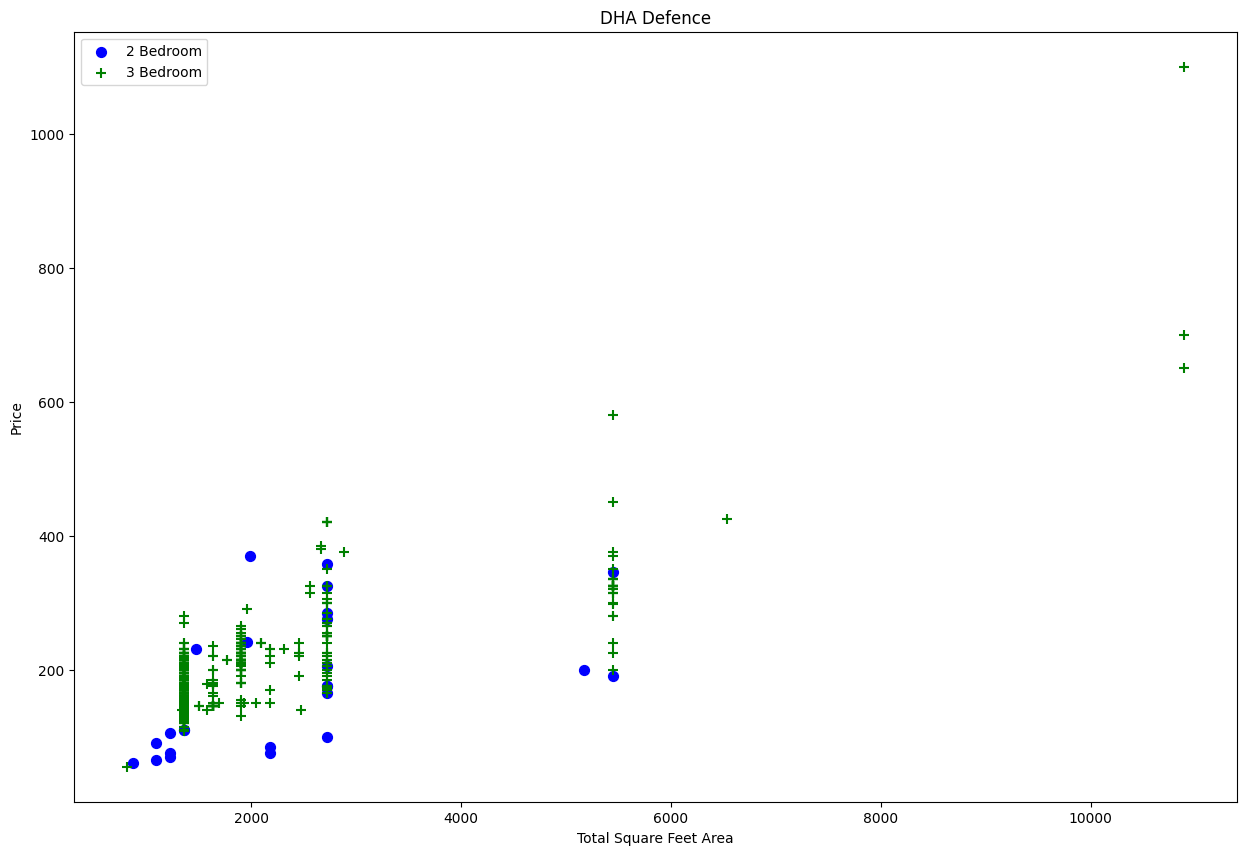

In [52]:
plot_scatter_chart(df, "DHA Defence")

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

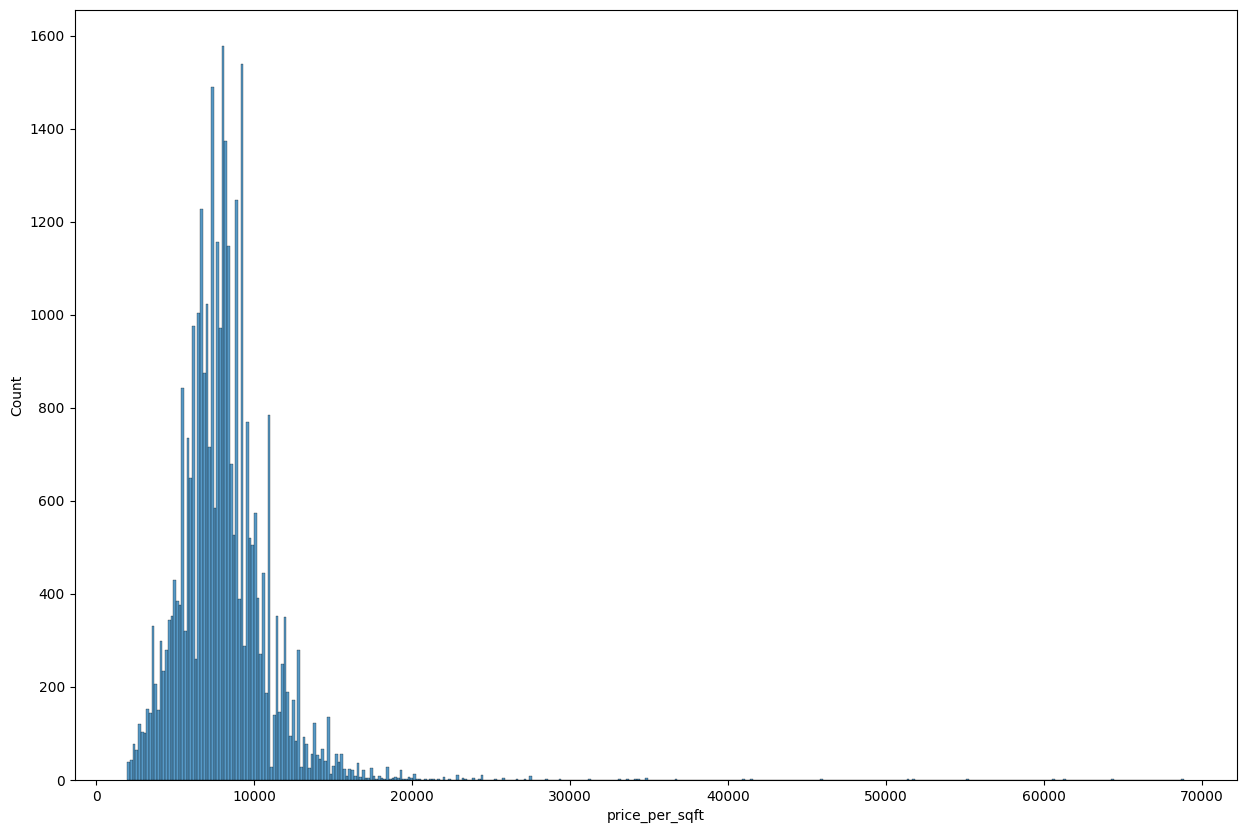

In [55]:
sns.histplot(data = df, x = "price_per_sqft")

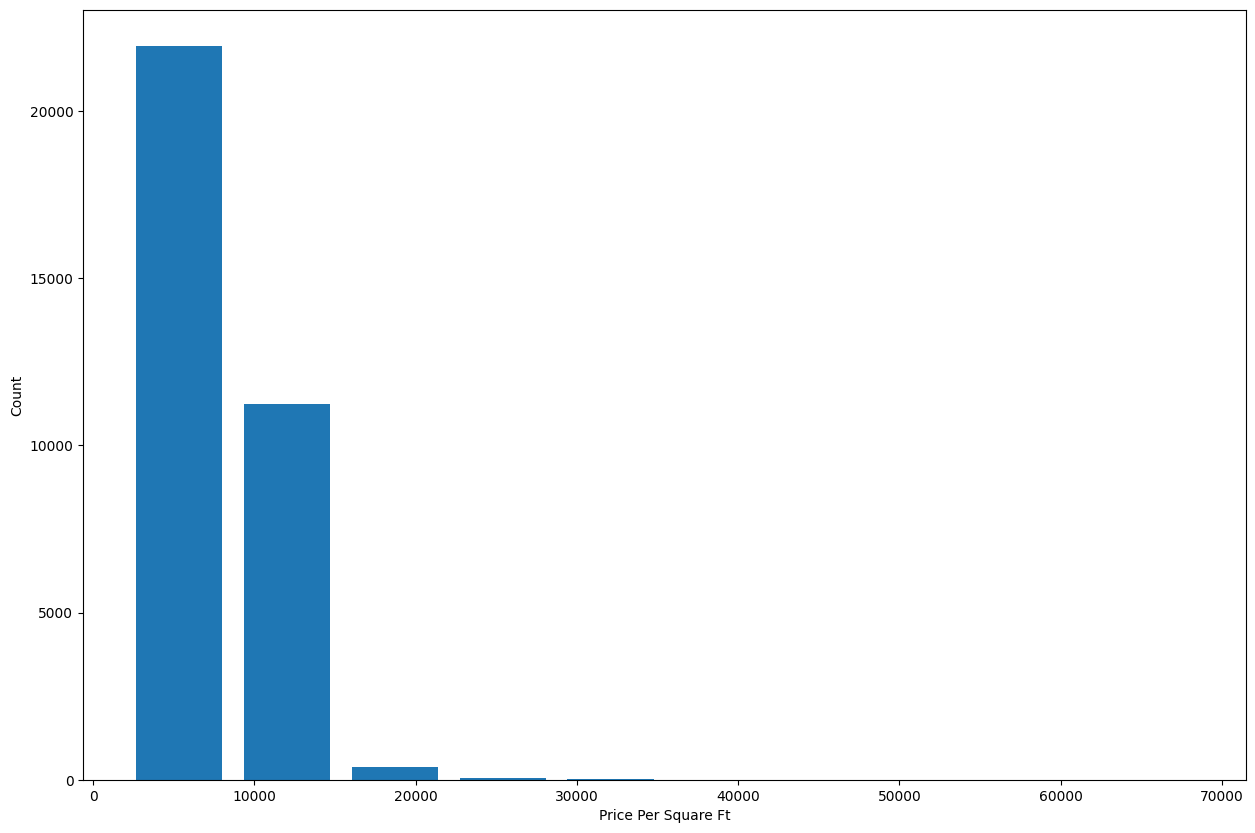

In [56]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(df['price_per_sqft'], rwidth=0.8)
plt.xlabel("Price Per Square Ft")
plt.ylabel("Count")
plt.show()

# we can see 10000 price per square feet is most common

Creating dummy varibales


In [57]:
dummies = pd.get_dummies(df["location"])
dummies.head()

,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,Airport Road,Al Faisal Town,Al Hafeez Gardens,Al Hamad Colony,Al Rehman Garden,Al-Hamad Colony (AIT),Al-Kabir Town,...,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other,others
48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df = pd.concat([df, dummies], axis = "columns") 
df.head()

,property_type,price,location,baths,bedrooms,new_area,area_sqft,price_per_sqft,Aashiana Road,Abdalians Cooperative Housing Society,...,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other,others
48,House,40000000,Multan Road,5,5,1,5445.00,7346.189164,0,0,...,0,0,0,0,0,0,0,0,0,0
50,House,125000000,Gulberg,7,8,1,5445.00,22956.841139,0,0,...,0,0,0,0,0,0,0,0,0,0
51,House,21000000,Allama Iqbal Town,5,6,0.55,2994.75,7012.271475,0,0,...,0,0,0,0,0,0,0,0,0,0
52,House,52000000,Gulberg,6,5,1,5445.00,9550.045914,0,0,...,0,0,0,0,0,0,0,0,0,0
53,House,16500000,Military Accounts Housing Society,7,6,0.4,2178.00,7575.757576,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# we dont need the price the 'location' and the 'other' column so we will simply drop it
df = df.drop(['location', 'others'], axis = 1)
df.head()

,property_type,price,baths,bedrooms,new_area,area_sqft,price_per_sqft,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,...,Township,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other
48,House,40000000,5,5,1,5445.00,7346.189164,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,House,125000000,7,8,1,5445.00,22956.841139,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,House,21000000,5,6,0.55,2994.75,7012.271475,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,House,52000000,6,5,1,5445.00,9550.045914,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53,House,16500000,7,6,0.4,2178.00,7575.757576,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df["property_type"].value_counts()

House         32280
Flat           1308
Farm House       30
Name: property_type, dtype: int64

In [61]:
# now lets map the proert type as it can be useful for our prediction but we need to conver it into numeric form
new_map = {
    'House':1,
    'Flat':2,
    'Farm House':3
}
df['new_property_type'] = df['property_type'].map(new_map)
df.head()

,property_type,price,baths,bedrooms,new_area,area_sqft,price_per_sqft,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,...,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other,new_property_type
48,House,40000000,5,5,1,5445.00,7346.189164,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,House,125000000,7,8,1,5445.00,22956.841139,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51,House,21000000,5,6,0.55,2994.75,7012.271475,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,House,52000000,6,5,1,5445.00,9550.045914,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53,House,16500000,7,6,0.4,2178.00,7575.757576,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
#lets drop the propetry type column as we will not use that anymore
df = df.drop(['property_type'], axis=1)

In [64]:
# as of now, we dont need the price_per_sqft and new_area so we will drop them
df = df.drop(['price_per_sqft', 'new_area'], axis=1)
df.head()

,price,baths,bedrooms,area_sqft,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,Airport Road,Al Faisal Town,Al Hafeez Gardens,...,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other,new_property_type
48,40000000,5,5,5445.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,125000000,7,8,5445.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51,21000000,5,6,2994.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,52000000,6,5,5445.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53,16500000,7,6,2178.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


BUILDING MODEL

In [65]:
X = df.drop('price', axis = 1)
X.head()

,baths,bedrooms,area_sqft,Aashiana Road,Abdalians Cooperative Housing Society,Airline Housing Society,Airport Road,Al Faisal Town,Al Hafeez Gardens,Al Hamad Colony,...,UET Housing Society,Upper Mall,Valencia Housing Society,Wahdat Road,Walton Road,Wapda Town,Zaheer Villas,Zaitoon - New Lahore City,other,new_property_type
48,5,5,5445.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
50,7,8,5445.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
51,5,6,2994.75,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
52,6,5,5445.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
53,7,6,2178.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
y = df['price']

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30, random_state=42)

lReg = LinearRegression()
lReg.fit(X_train, y_train)
y_predict = lReg.predict(X_test)

print("accuracy for training data: ", lReg.score(X_train, y_train))
print("accuracy for test data: ", lReg.score(X_test, y_test))


accuracy for training data:  0.7629100414780808
accuracy for test data:  0.7066352904277309


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_predict)
mae

6321800.851646484

In [69]:
mse = mean_squared_error(y_test, y_predict)
mse

238270194570533.38

In [70]:
rmse = np.sqrt(np.mean((y_predict - y_test)**2))
rmse

15436003.192877792

In [705]:
medae = median_absolute_error(y_test, y_predict)
medae

3177763.3917067815

In [706]:
r2 = r2_score(y_test, y_predict)
r2

0.7077316392180377

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
pipe = Pipeline(steps=[
    ('StandardScaler', StandardScaler()),
    ('LinearRegression', LinearRegression(normalize=True))
])



In [73]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.7066352904276886

In [76]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, X, y, cv=10)
print(f"Mean score: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior

Mean score: 0.7509214558363879
Standard deviation: 0.02778410079661468


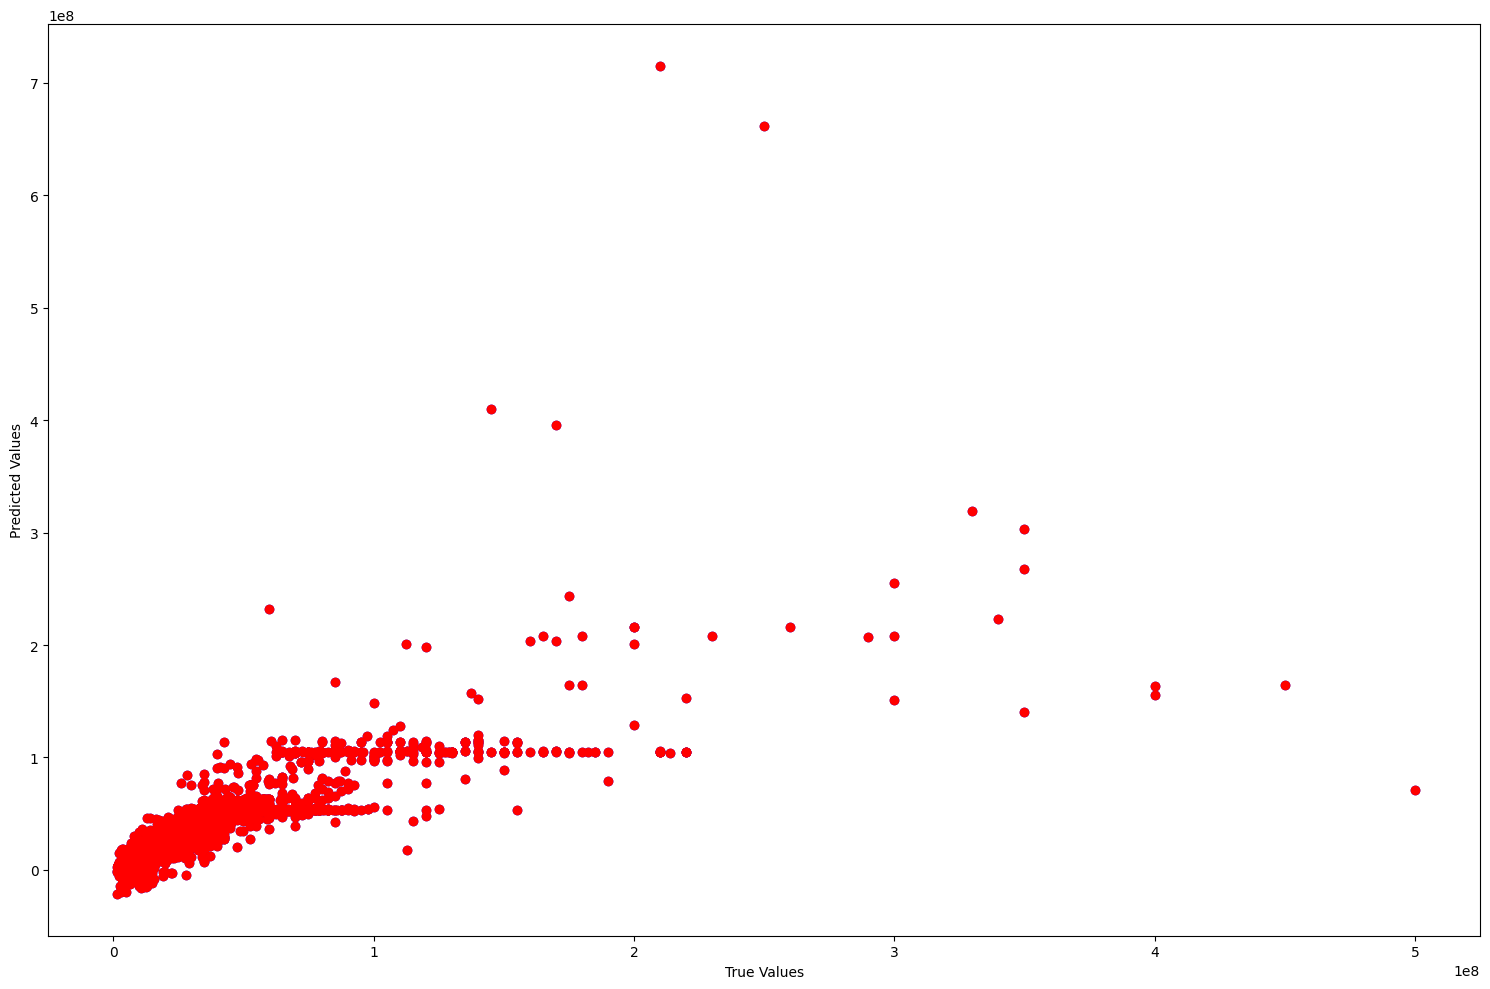

In [594]:
plt.scatter(y_test, y_predict, color='blue', label='True Values')
plt.scatter(y_test, y_predict, color='red', label='Predicted Values')
plt.plot([0, 6], [0, 6], '--k')
plt.axis('tight')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.tight_layout()
plt.show()